In [56]:
# import libraries 

from bs4 import BeautifulSoup
import requests
import time
import datetime
import smtplib

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu
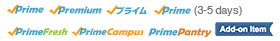

In [62]:
#Connect to Website and pull in data

URL = 'https://www.amazon.com/Apple-iPhone-12-64GB-Black/dp/B08PP5MSVB/ref=sr_1_1?crid=11FHVXVPO6OHZ&keywords=iphone+12&qid=1676474431&sprefix=iphone+12%2Caps%2C117&sr=8-1'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
page = requests.get(URL, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

print(soup2)
                      

title = soup2.find(id='productTitle').get_text()

price = soup2.find(id='corePrice_desktop').get_text()

#print(title)
#print(price)




In [58]:
# cleaning the data and pulling out title and price
price = price.strip()[0:]
title = title.strip()

print(title)
print(price)

Apple iPhone 12, 64GB, Black - Fully Unlocked (Renewed)
Price:
               



                  $409.00
                 

                  $409.00


In [42]:
# Create a Timestamp for your output to track when data was collected

import datetime

today = datetime.date.today()

print(today)

2023-02-15


In [18]:
# Create CSV and write headers and data into the file

import csv 

header = ['Title', 'Price', 'Date']
data = [title, price, today]


with open('AmazonWebScraperDataset.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [64]:
import pandas as pd

df = pd.read_csv(r'/Users/mohamedsalah/AmazonWebScraperDataset.csv')

print(df)

                                               Title  \
0  \n            Apple iPhone 12, 64GB, Black - F...   

                                               Price        Date  
0  \n\n\n\n\n                Price:\n            ...  2023-02-15  


In [65]:
#Now we are appending data to the csv

with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [66]:
#Combine all of the above code into one function


def check_price():
    URL = 'https://www.amazon.com/Apple-iPhone-12-64GB-Black/dp/B08PP5MSVB/ref=sr_1_1?crid=11FHVXVPO6OHZ&keywords=iphone+12&qid=1676474431&sprefix=iphone+12%2Caps%2C117&sr=8-1'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(URL, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")

    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    title = soup2.find(id='productTitle').get_text()

    price = soup2.find(id='priceblock_ourprice').get_text()

    price = price.strip()[1:]
    title = title.strip()

    import datetime

    today = datetime.date.today()
    
    import csv 

    header = ['Title', 'Price', 'Date']
    data = [title, price, today]

    with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)


In [73]:
# Runs check_price after a set time and inputs data into your CSV

while(True):
    check_price()
    time.sleep(86400)

AttributeError: 'NoneType' object has no attribute 'get_text'

In [69]:
import pandas as pd

df = pd.read_csv(r'/Users/mohamedsalah/AmazonWebScraperDataset.csv')

print(df)

                                               Title  \
0  \n            Apple iPhone 12, 64GB, Black - F...   
1  \n            Apple iPhone 12, 64GB, Black - F...   

                                               Price        Date  
0  \n\n\n\n\n                Price:\n            ...  2023-02-15  
1  \n\n\n\n\n                Price:\n            ...  2023-02-15  


In [71]:
#If uou want to try sending yourself an email (just for fun) when a price hits below a certain level you can try it
# out with this script

def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('Muhaadams5@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "The iphone you want is below $409! Now is your chance to buy!"
    body = "This is the bige moment. Now is your chance to bay the phone of your dreams. Don't mess it up! Link here: https://www.amazon.com/Apple-iPhone-12-64GB-Black/dp/B08PP5MSVB/ref=sr_1_1?crid=11FHVXVPO6OHZ&keywords=iphone+12&qid=1676474431&sprefix=iphone+12%2Caps%2C117&sr=8-1"

    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'muhaadams5@gmail.com',
        msg
     
    )